In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
DATA_FOLDER = 'data'
DEFAULT_FIGSIZE = (8, 8)

In [5]:
df = pd.read_csv(DATA_FOLDER + '/train.csv', index_col='Id')
df.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,,,,,,,,,,,,,,,,,,,,,
100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [6]:
df.Prediction = df.Prediction.apply(lambda x: -1 if x == 'b' else 1)
df.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,,,,,,,,,,,,,,,,,,,,,
100000,1,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
100001,-1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
100002,-1,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
100003,-1,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
100004,-1,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


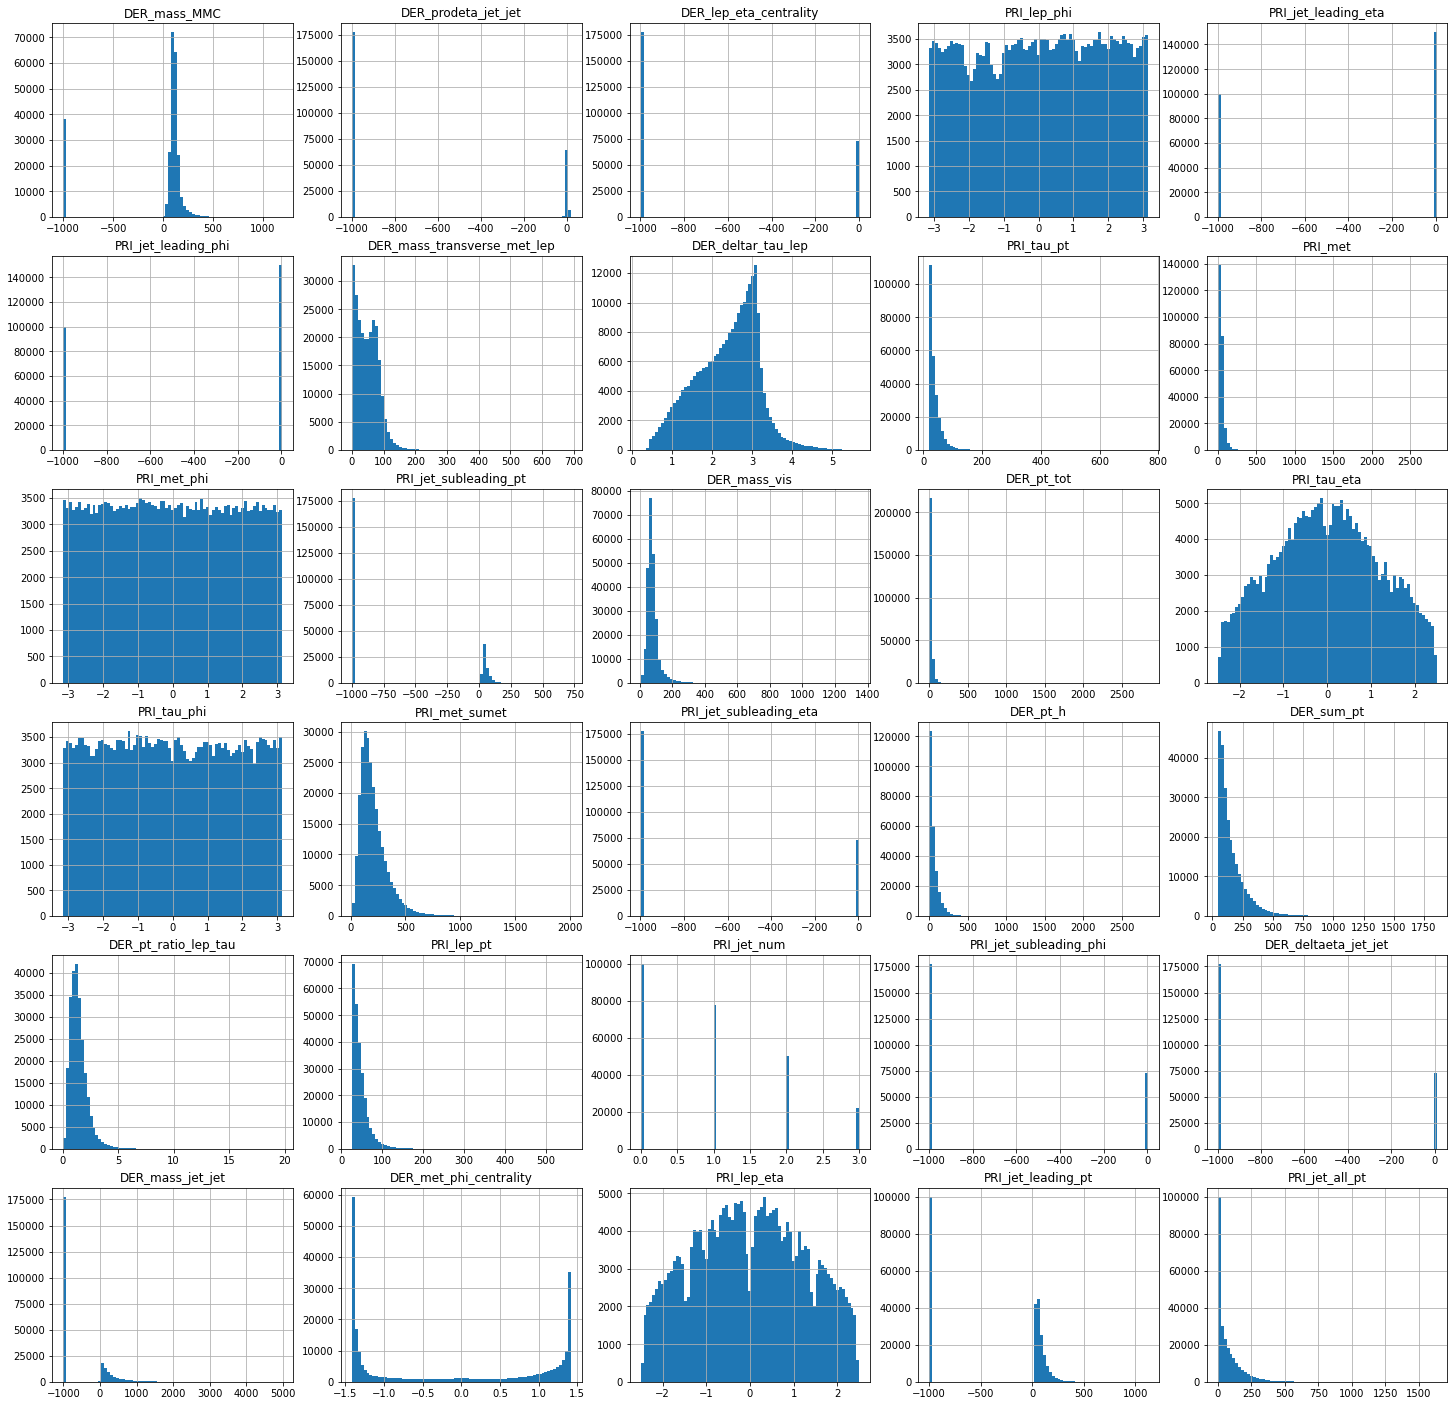

In [9]:
h, w = 6, 5
fig, axs = plt.subplots(h, w, figsize=(25,25))
for i, c in enumerate(df.drop('Prediction', axis=1).columns):
    row, col = i % h, i % w
    axs[row][col].hist(df[c], bins=75)
    axs[row][col].set_title(c)
    axs[row][col].grid()

plt.savefig('feature_distribution')
plt.show()

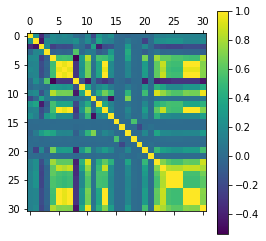

In [13]:
plt.matshow(df.corr())
plt.colorbar()
plt.savefig('feature_correlation')
plt.show()